# AUDIO PREPROCESSING DEMO

**NOTE**: For conceptual information, check the README of this project.

---

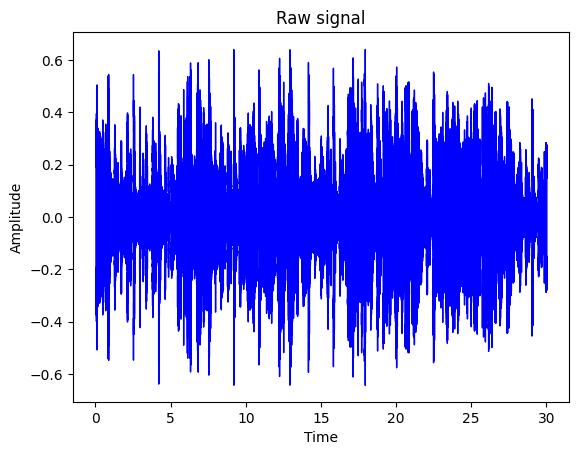

In [21]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
audio_folder = 'storage/data/genres_original'

#================================================
# Load an example audio file and convert the data to mel spectrogram

# Name of the file:
example_id = 'reggae/reggae.00092.wav'
# Sampling rate:
sr = 22050
# Loading the file using `librosa`:
example_signal, sr = librosa.load(audio_folder + '/' + example_id, sr=sr)
# NOTE 1: 'Signal' here indicates the audio file as a whole.
# NOTE 2: `audio_folder` was defined earlier.
#================================================
# Show player

ipd.display(ipd.Audio(example_signal, rate=sr))

#================================================
# Graph the signal

librosa.display.waveshow(example_signal, sr=sr, color='blue')
# NOTE: `librosa.display.waveplot` has been replaced by `librosa.display.waveshow`
plt.title('Raw signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## Magnitudes for each frequency checked in the FFT (Fast Fourier Transform)

In [10]:
fft = np.fft.fft(example_signal)

The above function gives an array of complex numbers, each corresponding to a sinusoid whose contribution to the signal is checked by the FFT. Each complex number is such that:

- Real part = Amplitude of the cosine component
- Imaginary part = Amplitude of the sine component


**NOTE**: Number of sinusoids checked by the FFT (hence, length of `fft`):

Length of `fft`

= Sampling rate (samples per second) x length of the total signal (in seconds)

= 22050 x 30

= 661500

In [13]:
magnitude = np.abs(fft)

The above function calculates the magnitude of each complex number in `fft`, which was calculated in the previous line of code using `np.fft.fft`. The magnitude indicates the contribution of the corresponding sinusoid to the final signal (`example_signal` in this case).

**NOTE**: Length of `magnitude`:
Remember that length of `fft`

= sampling rate (samples per second) x length of the total signal (in seconds)

= 22050 x 30

= 661500

Hence also for `magnitude`.

In [14]:
frequency = np.linspace(0, sr, len(magnitude))

**NOTE: Maximum frequency checked** $\leq$ **Sampling rate**:

The maximum frequency checked is just below the sampling rate since the sampling rate determines the highest frequency detectable.

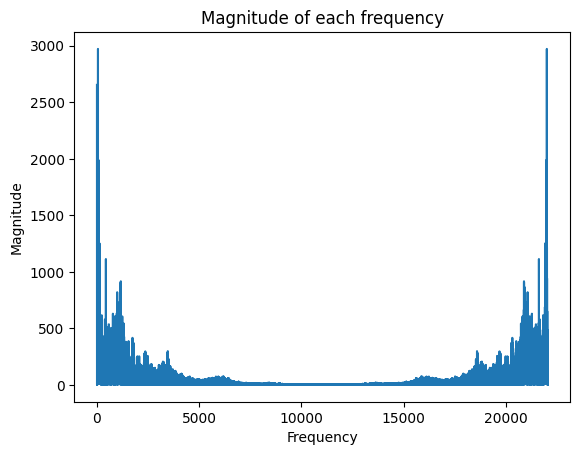

In [15]:
plt.plot(frequency, magnitude)
plt.title('Magnitude of each frequency')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

## Spectrograms & melspectrograms
Spectrograms...

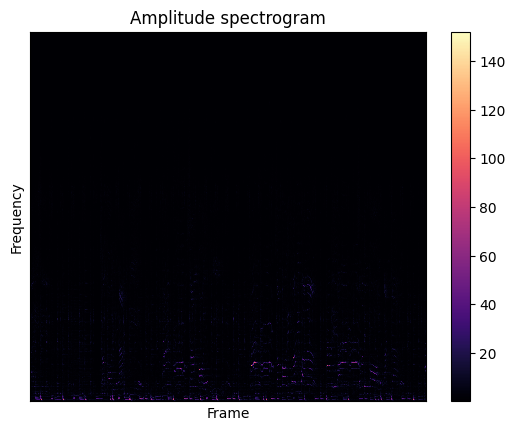

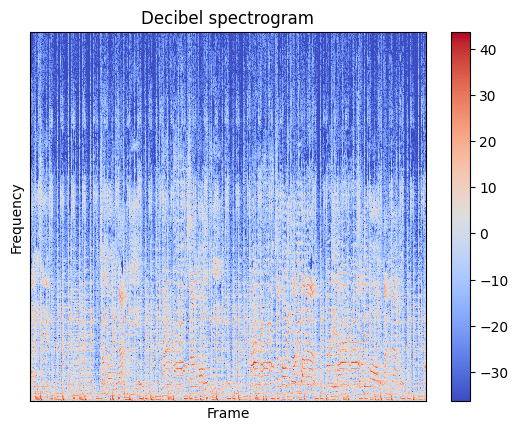

In [19]:
# Number of sinusoids to check for in FFT (i.e. FFT size):
n_fft = 2048
# Hop length:
hop_length = 512
# Short-time Fourier transform:
stft = librosa.core.stft(example_signal, hop_length=hop_length, n_fft=n_fft)
# Spectrogram data:
spectrogram = np.abs(stft)

# Spectrogram with signal power measured in amplitude (linear scale)...
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.title('Amplitude spectrogram')
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.colorbar()
# NOTE: Amplitude is represented by colour
plt.show()

# Spectrogram with signal power measured in decibels (logarithmic scale)...
db_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(db_spectrogram, sr=sr, hop_length=hop_length)
plt.title('Decibel spectrogram')
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.colorbar()
# NOTE: Amplitude is represented by colour
plt.show()

Melspectrograms...

**NOTE**: Mel bands represent frequency ranges scaled according to their significance to human perception (roughly a logarithmic scale), whereas a regular spectrogram's frequencies are linearly scaled.

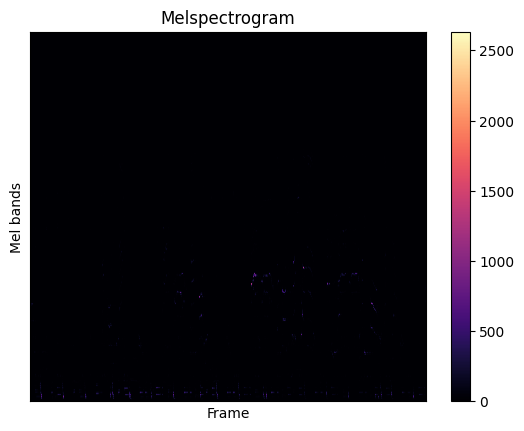

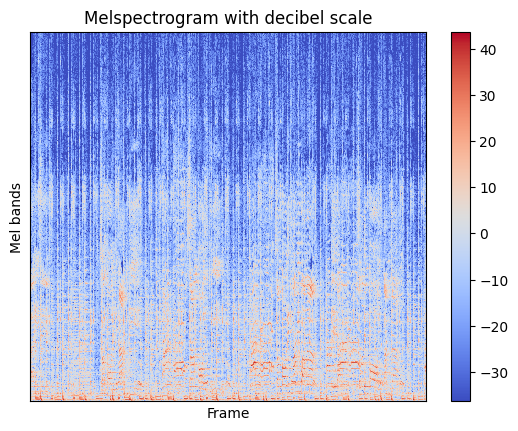

In [20]:
# Melspectrogram...
n_mels = 512 # Number of mel bands to be used
melspectrogram = librosa.feature.melspectrogram(y=example_signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
librosa.display.specshow(melspectrogram, sr=sr, hop_length=hop_length)
plt.title('Melspectrogram')
plt.xlabel('Frame')
plt.ylabel('Mel bands')
plt.colorbar()
# NOTE: Mel bands are represented by colour
plt.show()

# Melspectrogram with signal power measured in decibels (logarithmic scale)...
log_melspectrogram = librosa.feature.melspectrogram(S=db_spectrogram, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
librosa.display.specshow(db_spectrogram, sr=sr, hop_length=hop_length)
plt.title('Melspectrogram with decibel scale')
plt.xlabel('Frame')
plt.ylabel('Mel bands')
plt.colorbar()
# NOTE: Mel bands are represented by colour
plt.show()